#Importing relevant libraries

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#Sign language task

In [2]:
!unzip "hand sign.zip"

Archive:  hand sign.zip
  inflating: amer_sign2.png          
  inflating: amer_sign3.png          
  inflating: american_sign_language.PNG  
  inflating: sign_mnist_train.csv    
  inflating: sign_mnist_train/sign_mnist_train.csv  


In [3]:
model = models.Sequential()

model.add(layers.Conv2D(
    filters=32,
    kernel_size=(3, 3),
    activation="relu",
    input_shape=(28, 28, 1)
))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(
    filters=64,
    kernel_size=(3, 3),
    activation="relu"
))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dropout(0.28))
model.add(layers.Dense(26, activation="softmax"))

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 26)                  │           3,354 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 227,098 (887.10 KB)

 Trainable params: 227,098 (887.10 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
df = pd.read_csv("sign_mnist_train.csv")

X = df.iloc[:, 1:].values / 255.0
X = X.reshape(-1, 28, 28, 1)

y = df.iloc[:, 0].values
y = to_categorical(y, num_classes=26)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [5]:
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32
)

Epoch 1/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 39s 52ms/step - accuracy: 0.3541 - loss: 2.1398 - val_accuracy: 0.9279 - val_loss: 0.2867
Epoch 2/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 34s 42ms/step - accuracy: 0.8920 - loss: 0.3368 - val_accuracy: 0.9922 - val_loss: 0.0528
Epoch 3/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 37s 36ms/step - accuracy: 0.9600 - loss: 0.1326 - val_accuracy: 0.9973 - val_loss: 0.0230
Epoch 4/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.9793 - loss: 0.0729 - val_accuracy: 0.9989 - val_loss: 0.0115
Epoch 5/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 24s 35ms/step - accuracy: 0.9868 - loss: 0.0479 - val_accuracy: 0.9995 - val_loss: 0.0033
Epoch 6/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 40s 33ms/step - accuracy: 0.9885 - loss: 0.0406 - val_accuracy: 0.9998 - val_loss: 0.0028
Epoch 7/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 41s 33ms/step - accuracy: 0.9870 - loss: 0.0372 - val_accuracy: 0.9996 - val_loss: 0.0015
Epoch 8/20
687/687 ━━━━━━━━━━━━━━━━━━━━ 42s 35ms/step - accuracy: 0.9901 - loss: 0.0302 - 

In [6]:
epochs = range(1, 21)
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

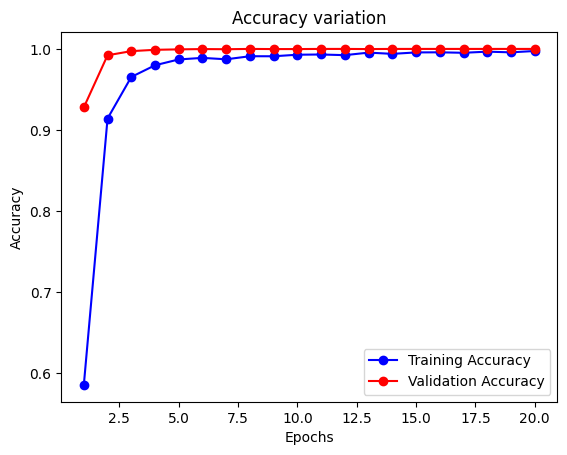

In [7]:
plt.plot(epochs, train_acc, "bo-", label="Training accuracy")
plt.plot(epochs, val_acc, "ro-", label="Validation accuracy")
plt.title("Accuracy variation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

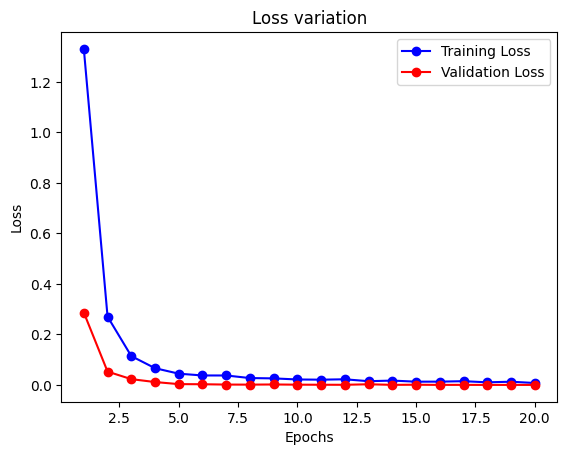

In [8]:
plt.plot(epochs, train_loss, "bo-", label="Training loss")
plt.plot(epochs, val_loss, "ro-", label="Validation loss")
plt.title("Loss variation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

#Power consumption task

In [9]:
!unzip "individual+household+electric+power+consumption.zip"

Archive:  individual+household+electric+power+consumption.zip
  inflating: household_power_consumption.txt  


In [10]:
df = pd.read_csv("household_power_consumption.txt", sep=";", parse_dates={"Datetime": ["Date", "Time"]}, infer_datetime_format=True, low_memory=False, na_values=["?", "nan"])

df = df[["Datetime", "Global_active_power"]]
df["Global_active_power"] = pd.to_numeric(df["Global_active_power"], errors="coerce")
df.dropna(inplace=True)
df.set_index("Datetime", inplace=True)

daily_data = df.resample("D").sum()
scaler = MinMaxScaler()
daily_data_scaled = scaler.fit_transform(daily_data)

<ipython-input-10-570bcad12756>:1: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv("household_power_consumption.txt", sep=';', parse_dates={'Datetime': ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['?', 'nan'])
<ipython-input-10-570bcad12756>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv("household_power_consumption.txt", sep=';', parse_dates={'Datetime': ['Date', 'Time']}, infer_datetime_format=True, low_memory=False, na_values=['?', 'nan'])
<ipython-input-10-570bcad12756>:1: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `day

In [11]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    return np.array(X), np.array(y)

In [12]:
window_size = 30
X, y = create_sequences(daily_data_scaled, window_size)

In [13]:
split_ratio = 0.8
split_index = int(len(X) * split_ratio)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [14]:
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(window_size, 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer="adam", loss="mse", metrics=["mae"])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0344 - mae: 0.1452 - val_loss: 0.0079 - val_mae: 0.0676
Epoch 2/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 0.0117 - mae: 0.0831 - val_loss: 0.0082 - val_mae: 0.0684
Epoch 3/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0110 - mae: 0.0813 - val_loss: 0.0077 - val_mae: 0.0659
Epoch 4/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0119 - mae: 0.0821 - val_loss: 0.0077 - val_mae: 0.0665
Epoch 5/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0107 - mae: 0.0782 - val_loss: 0.0083 - val_mae: 0.0693
Epoch 6/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0116 - mae: 0.0807 - val_loss: 0.0078 - val_mae: 0.0664
Epoch 7/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0114 - mae: 0.0790 - val_loss: 0.0076 - val_mae: 0.0652
Epoch 8/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0099 - mae: 0.0747 - val_loss: 0.0075 - val_mae: 0.0641
Epoch 9/50
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.011

In [16]:
test_predictions = model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


In [17]:
rmse = np.sqrt(np.mean((y_test_rescaled - test_predictions)**2))
mae = np.mean(np.abs(y_test_rescaled - test_predictions))
print(f"RMSE: {rmse}, MAE: {mae}")

RMSE: 381.6124436160271, MAE: 276.8494360455085


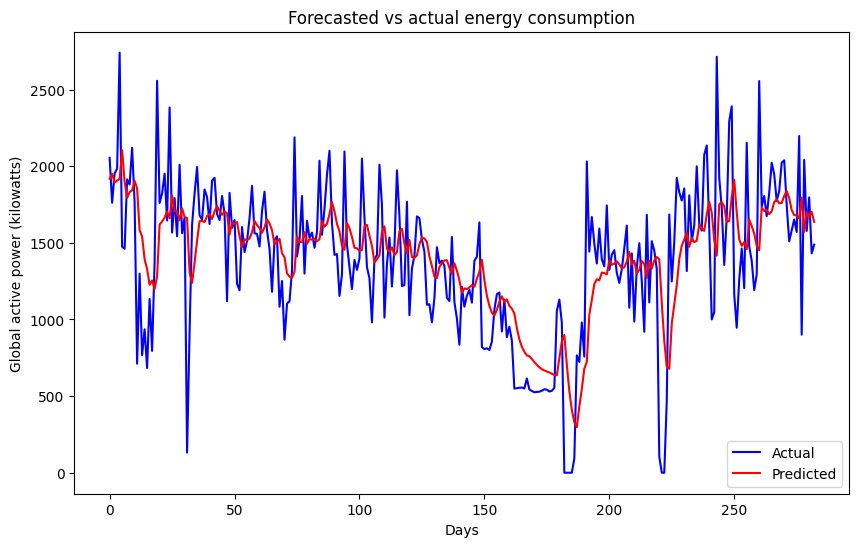

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test_rescaled)), y_test_rescaled, label="Actual", color="blue")
plt.plot(range(len(test_predictions)), test_predictions, label="Predicted", color="red")
plt.title("Forecasted vs actual energy consumption")
plt.xlabel("Days")
plt.ylabel("Global active power (kilowatts)")
plt.legend()
plt.show()